In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px





In [43]:
data = pd.read_csv('Chess.csv')

In [44]:
data.head()

,Position (in January),Name,ELO,Date,Age
0,1,Carlsen,2862,2021 Jan,30
1,2,Caruana,2823,2021 Jan,28
2,3,Ding Liren,2791,2021 Jan,28
3,4,Nepomniachtchi,2789,2021 Jan,30
4,5,Vachier-Lagrave,2784,2021 Jan,30


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Position (in January)  440 non-null    int64 
 1   Name                   440 non-null    object
 2   ELO                    440 non-null    int64 
 3   Date                   440 non-null    object
 4   Age                    440 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 17.3+ KB


In [45]:
data.shape

(440, 5)

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Position (in January),440.0,10.500000,5.772845,1.0,5.75,10.5,15.25,20.0
ELO,440.0,2751.063636,37.865372,2672.0,2726.75,2750.0,2773.00,2872.0
Age,440.0,30.252273,7.201461,17.0,24.00,30.0,35.00,51.0


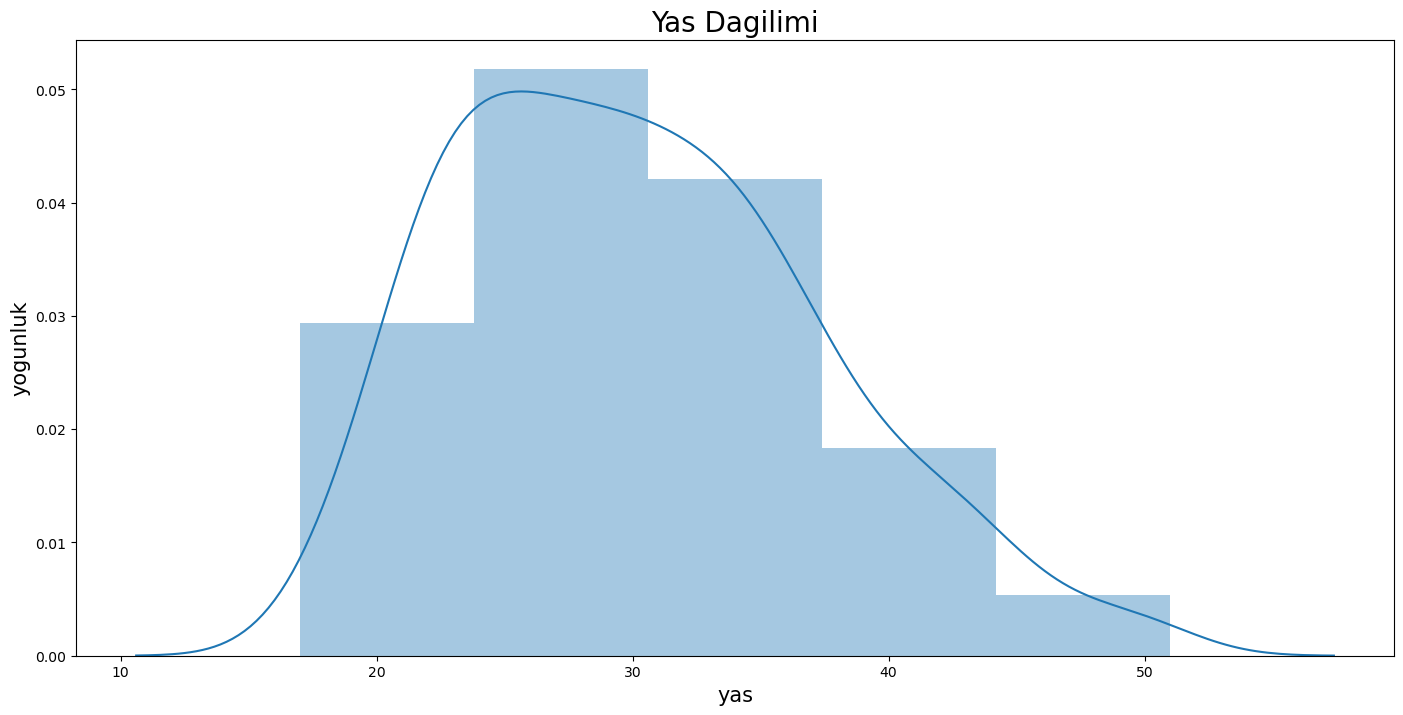

In [46]:
fig, ax = plt.subplots(1, 1,figsize=(17, 8))
sns.distplot(data['Age'], ax=ax, bins=5)
plt.title('Yas Dagilimi', fontsize=20)
plt.ylabel('yogunluk', fontsize=15)
plt.xlabel('yas', fontsize=15)
plt.show()

In [65]:
data['Date'] = data['Date'].str.replace(" ", '/')
data['New_Date'] = pd.to_datetime(data['Date'])
data.head()
data['New_Date'].value_counts()

2021-01-01    20
2020-01-01    20
2001-01-01    20
2002-01-01    20
2003-01-01    20
2004-01-01    20
2005-01-01    20
2006-01-01    20
2007-01-01    20
2008-01-01    20
2009-01-01    20
2010-01-01    20
2011-01-01    20
2012-01-01    20
2013-01-01    20
2014-01-01    20
2015-01-01    20
2016-01-01    20
2017-01-01    20
2018-01-01    20
2019-01-01    20
2000-01-01    20
Name: New_Date, dtype: int64

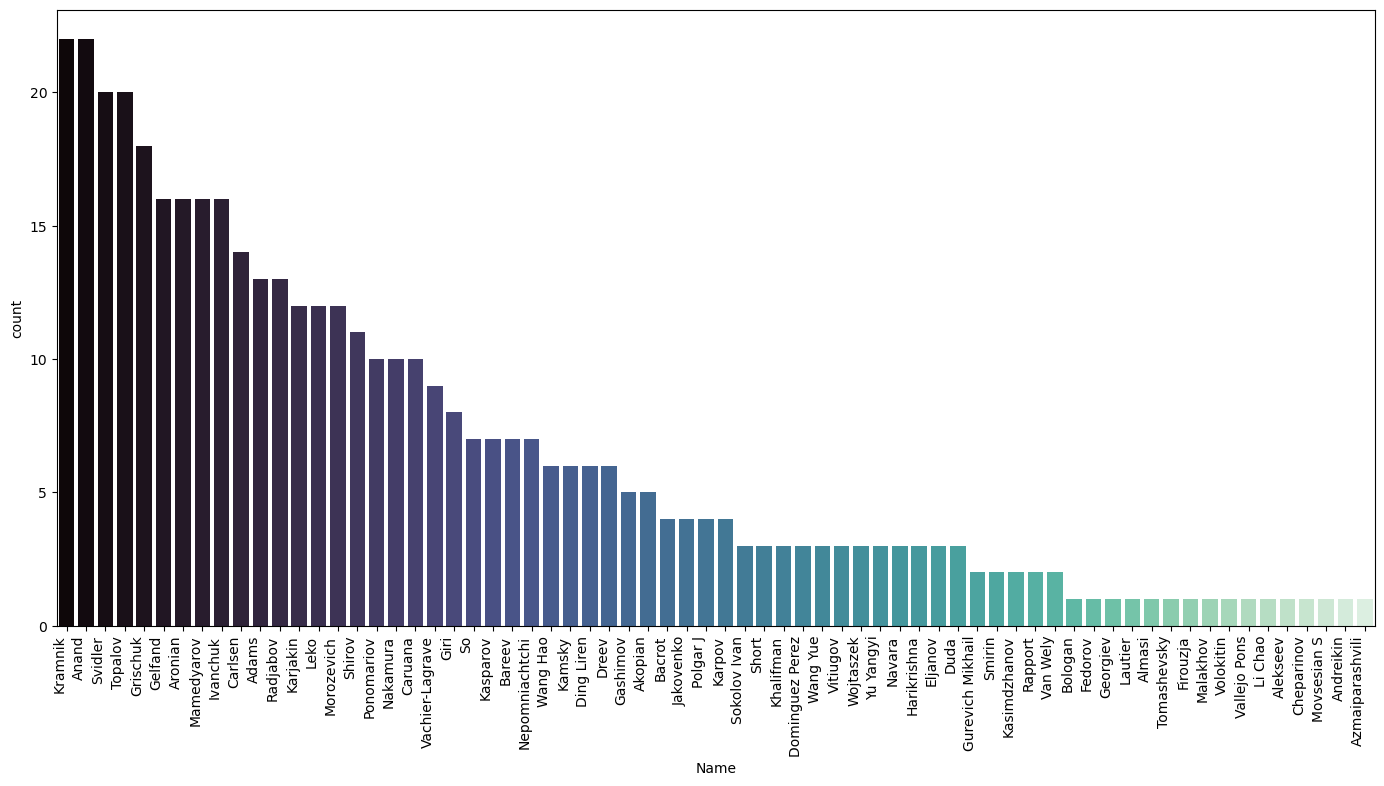

In [66]:
fig, ax = plt.subplots(1, 1,figsize=(17, 8))
sns.countplot(data['Name'], 
             order = data['Name'].value_counts().index,
             palette='mako',
             ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')



plt.show()

In [67]:
def year_wise(year):
    fig, ax = plt.subplots(1, 1,figsize=(20, 8))
    sns.color_palette("mako", as_cmap=True)
    sns.barplot(data=data[data.New_Date.dt.year==year],x='Name', y='ELO',ax=ax, palette="mako" )
    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
    ax.set_ylim(2500, 3000)
    ax.set_title(f'For Year {year}', size=22)
    plt.show()

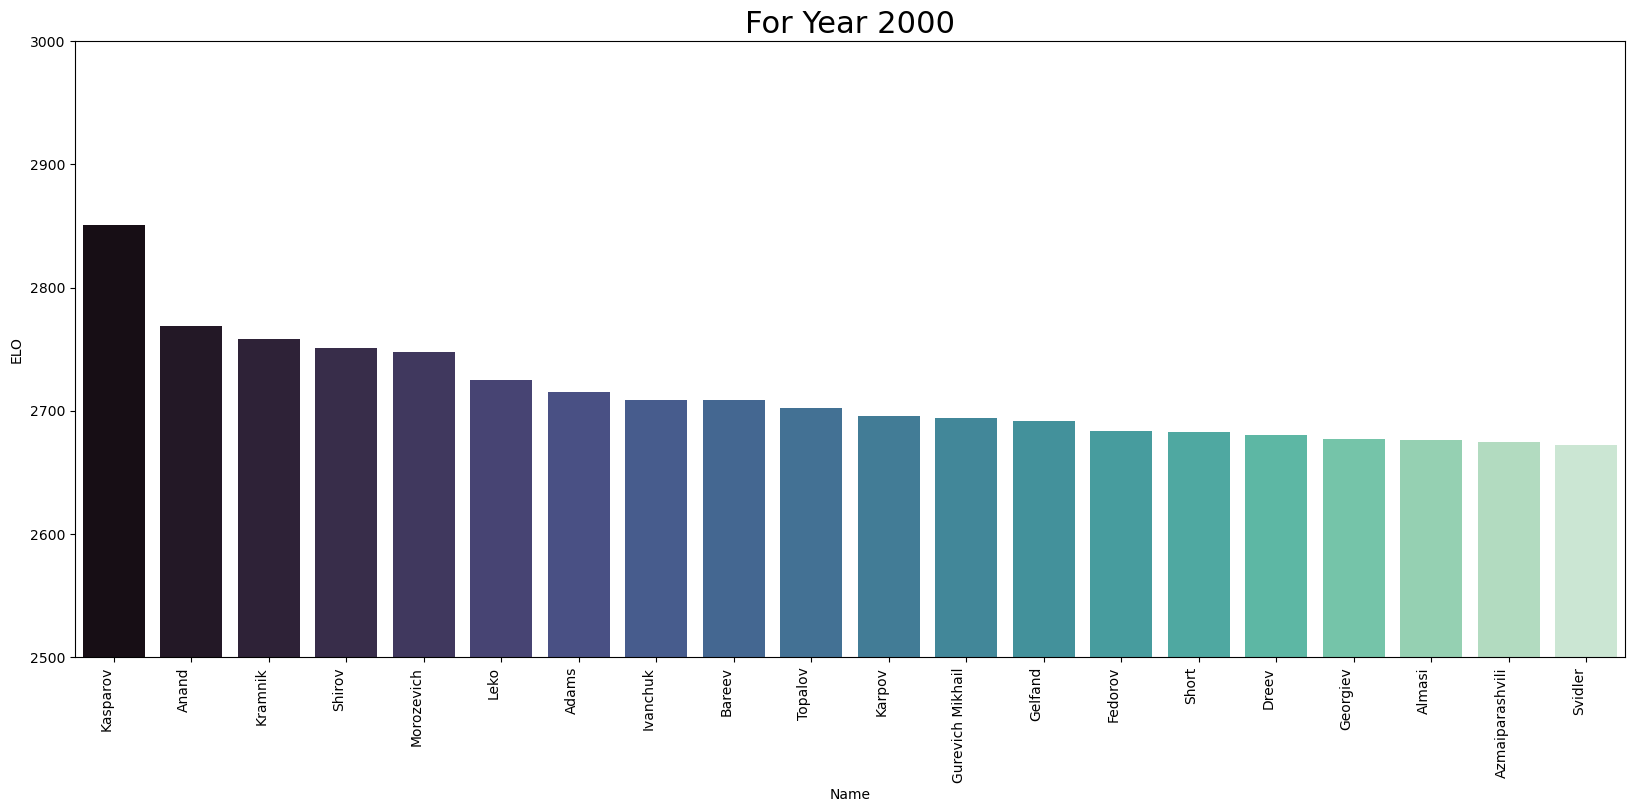

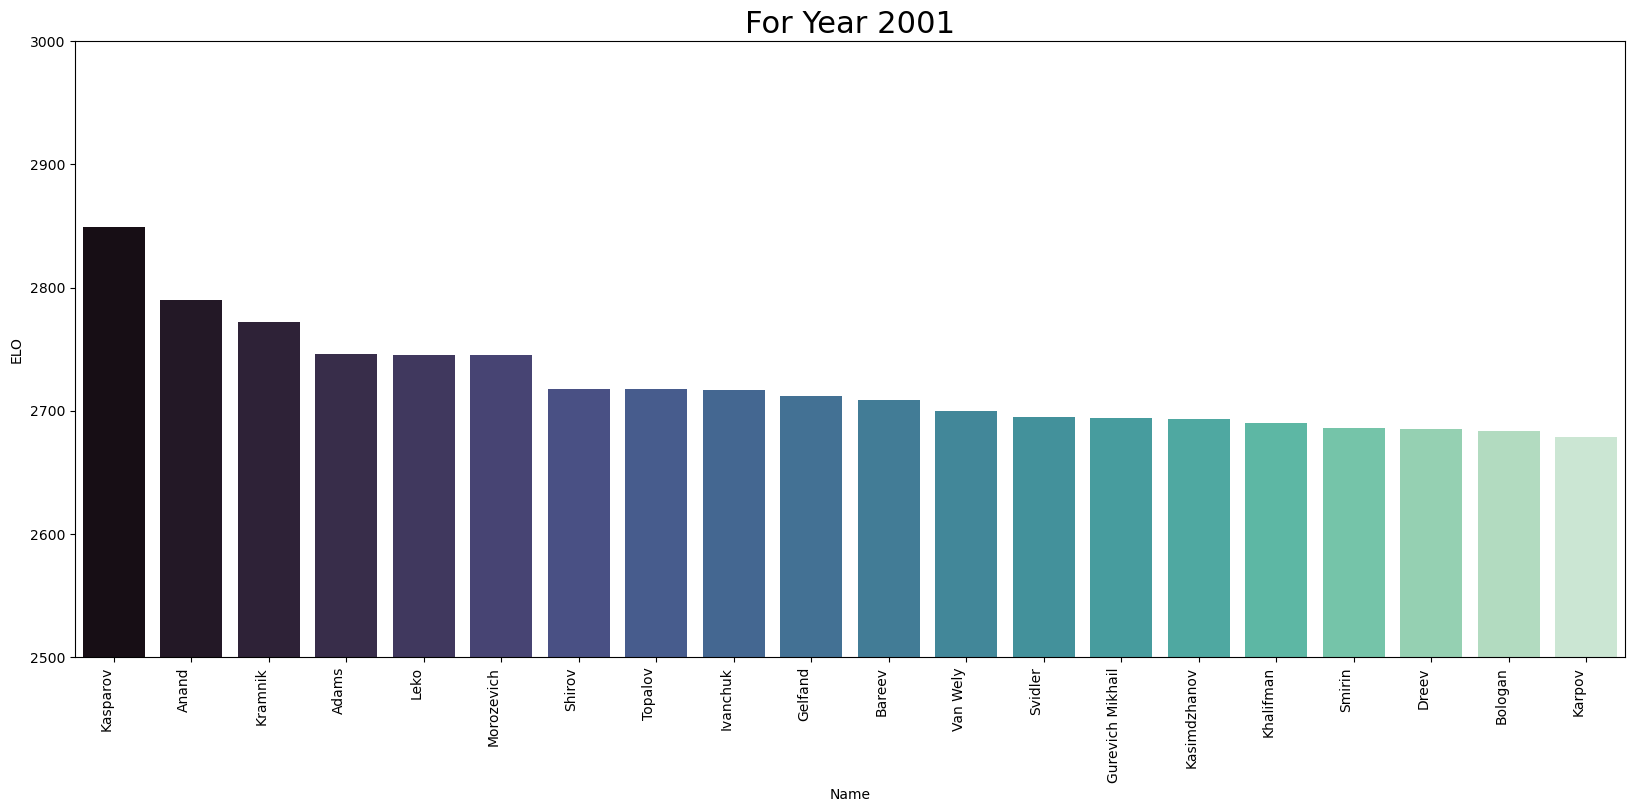

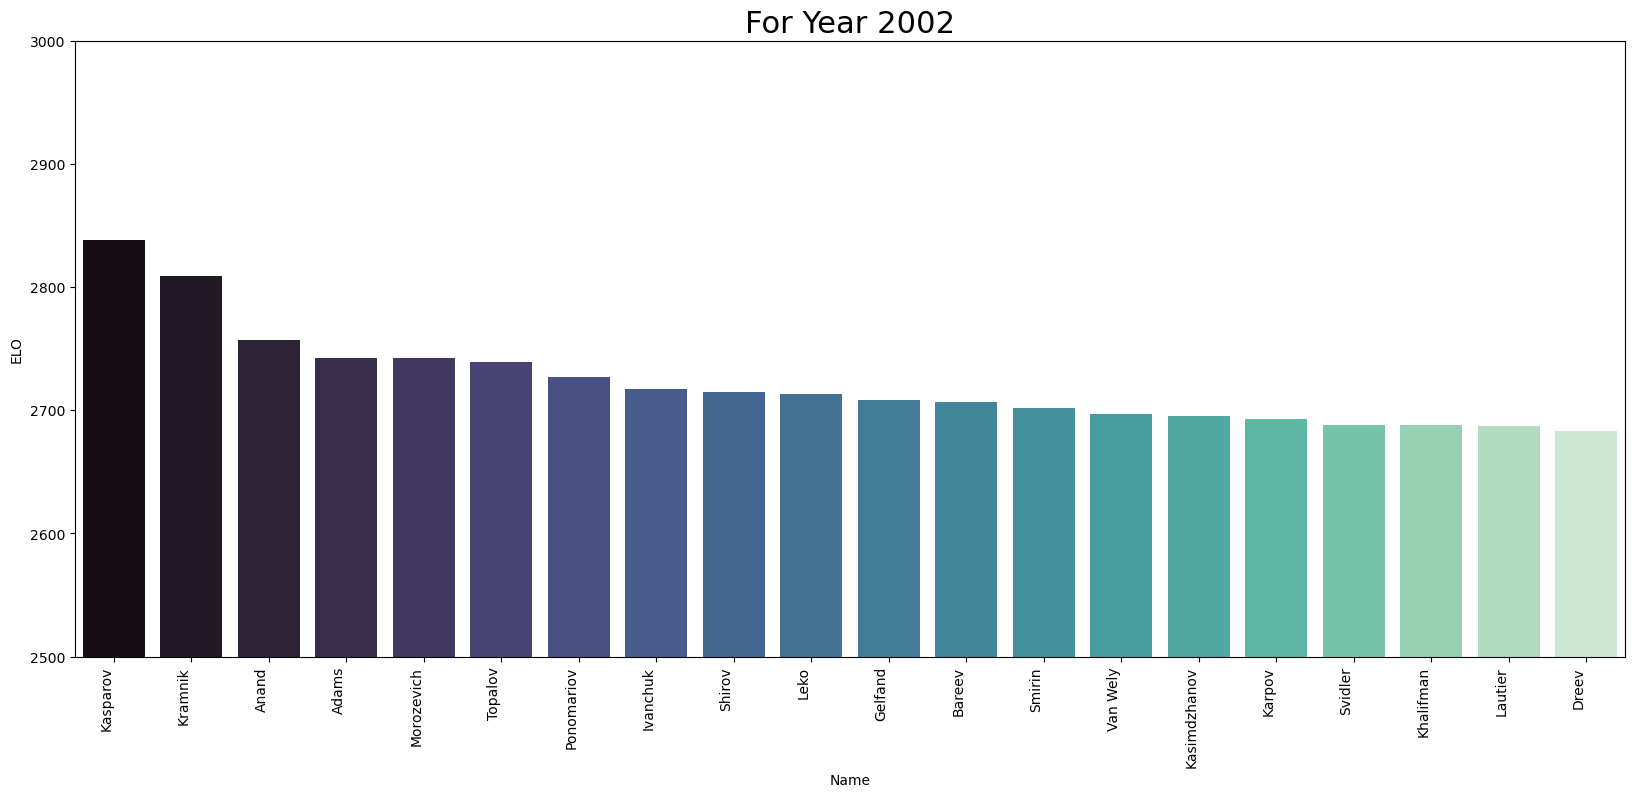

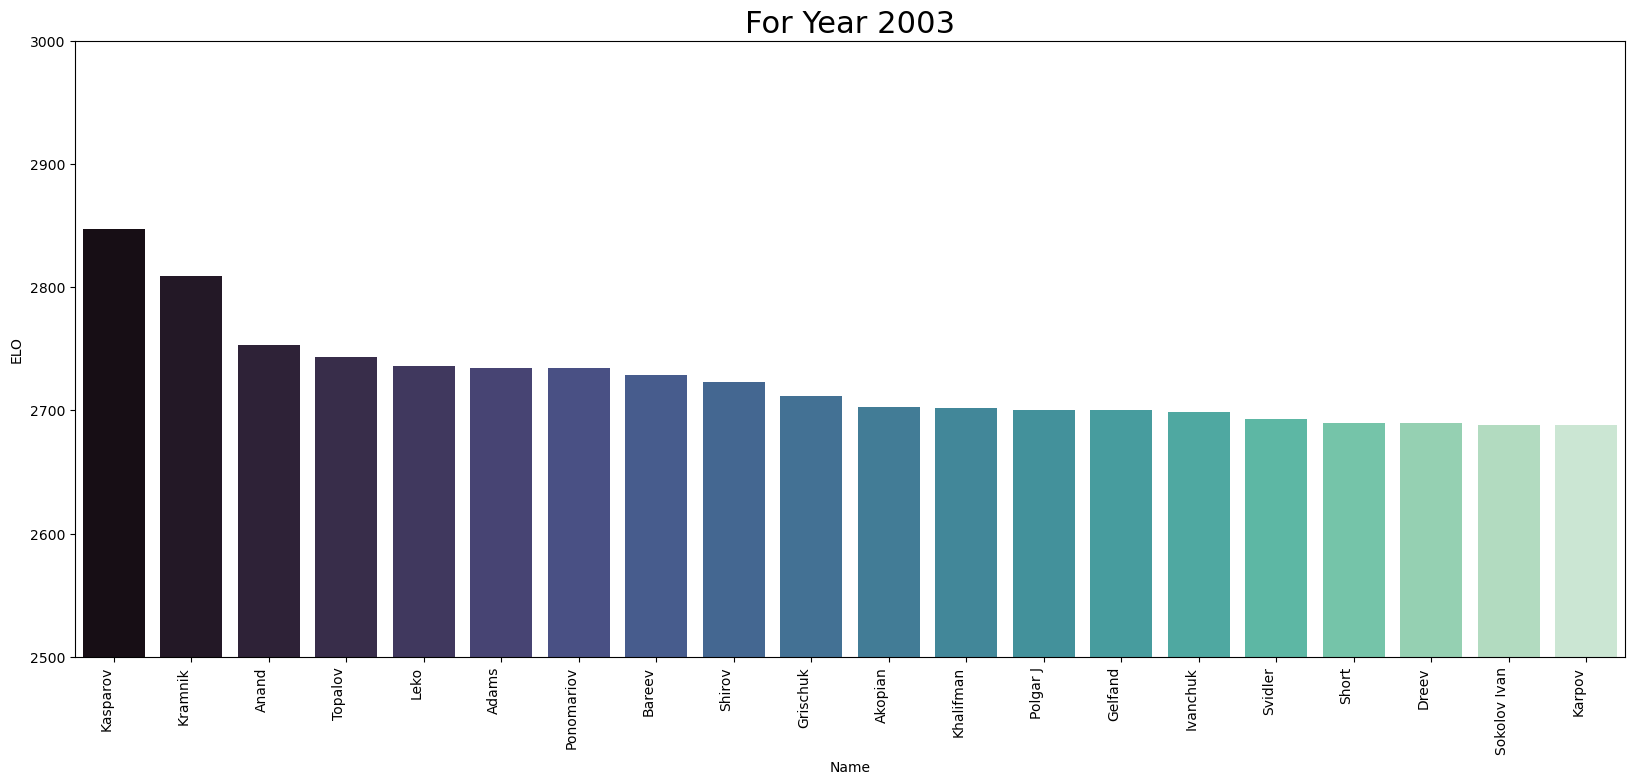

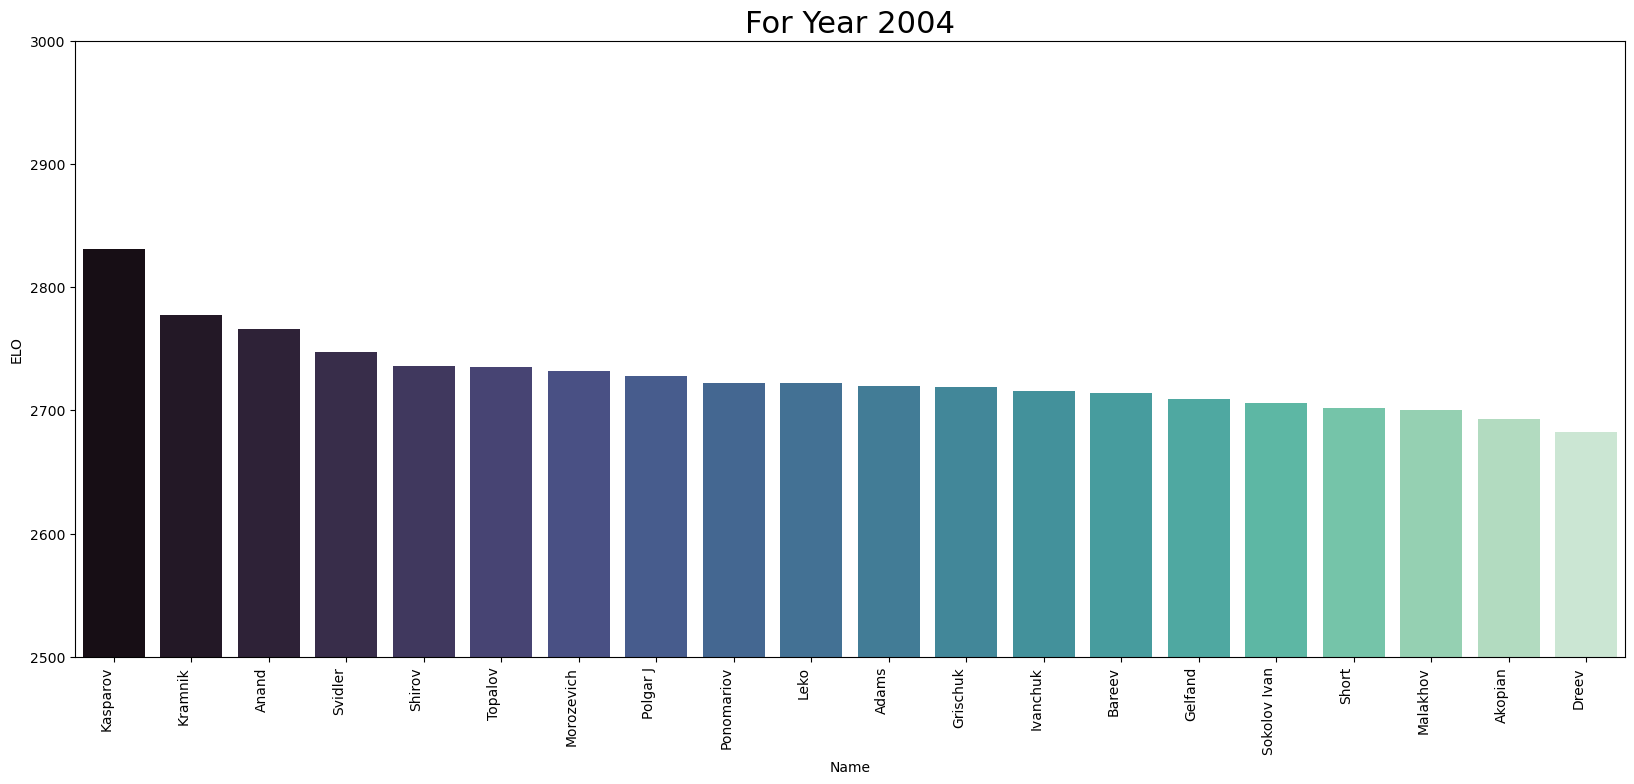

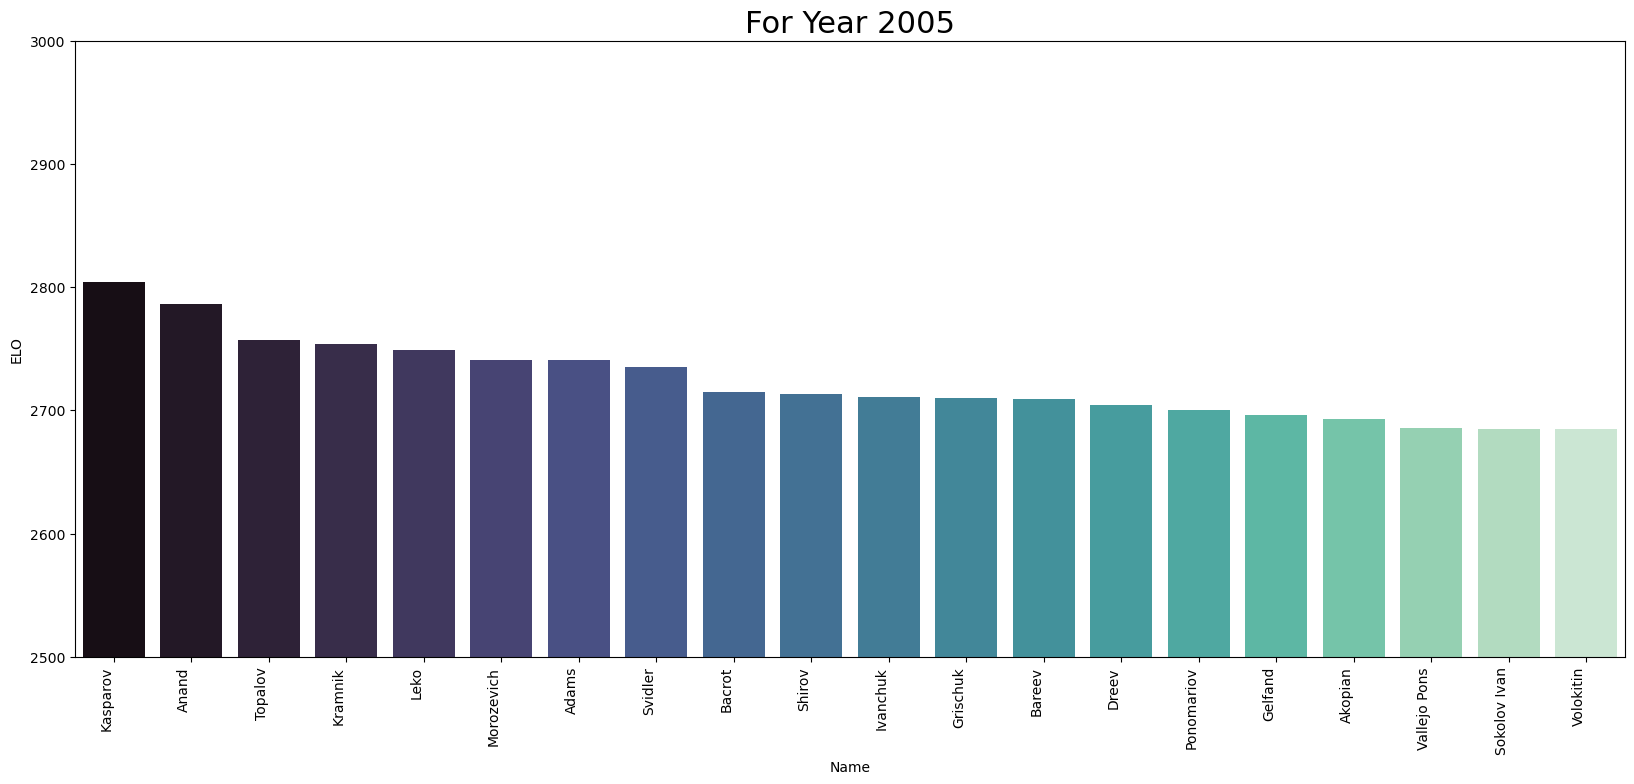

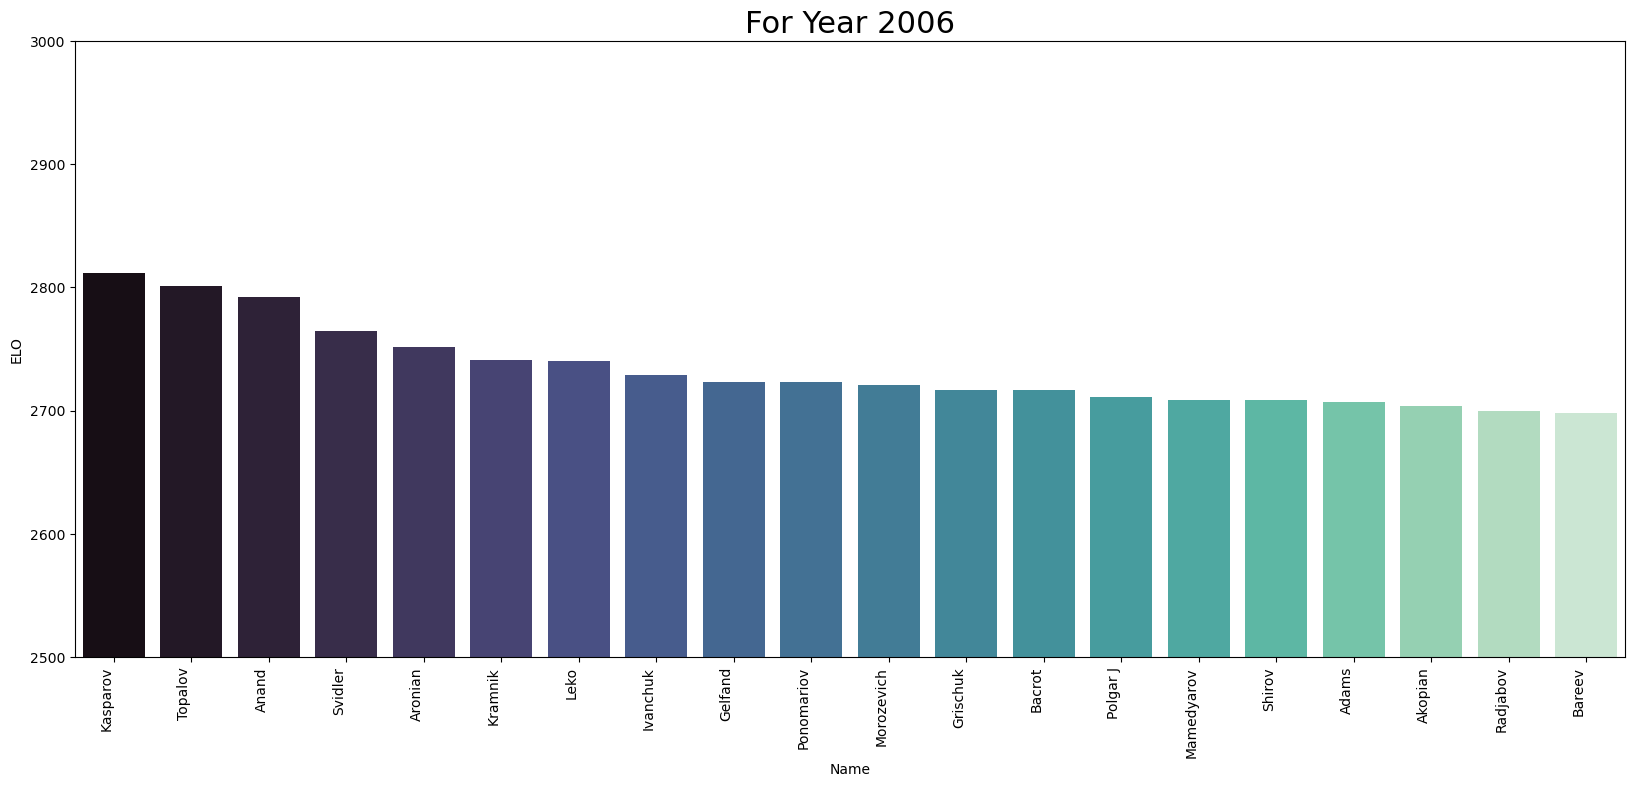

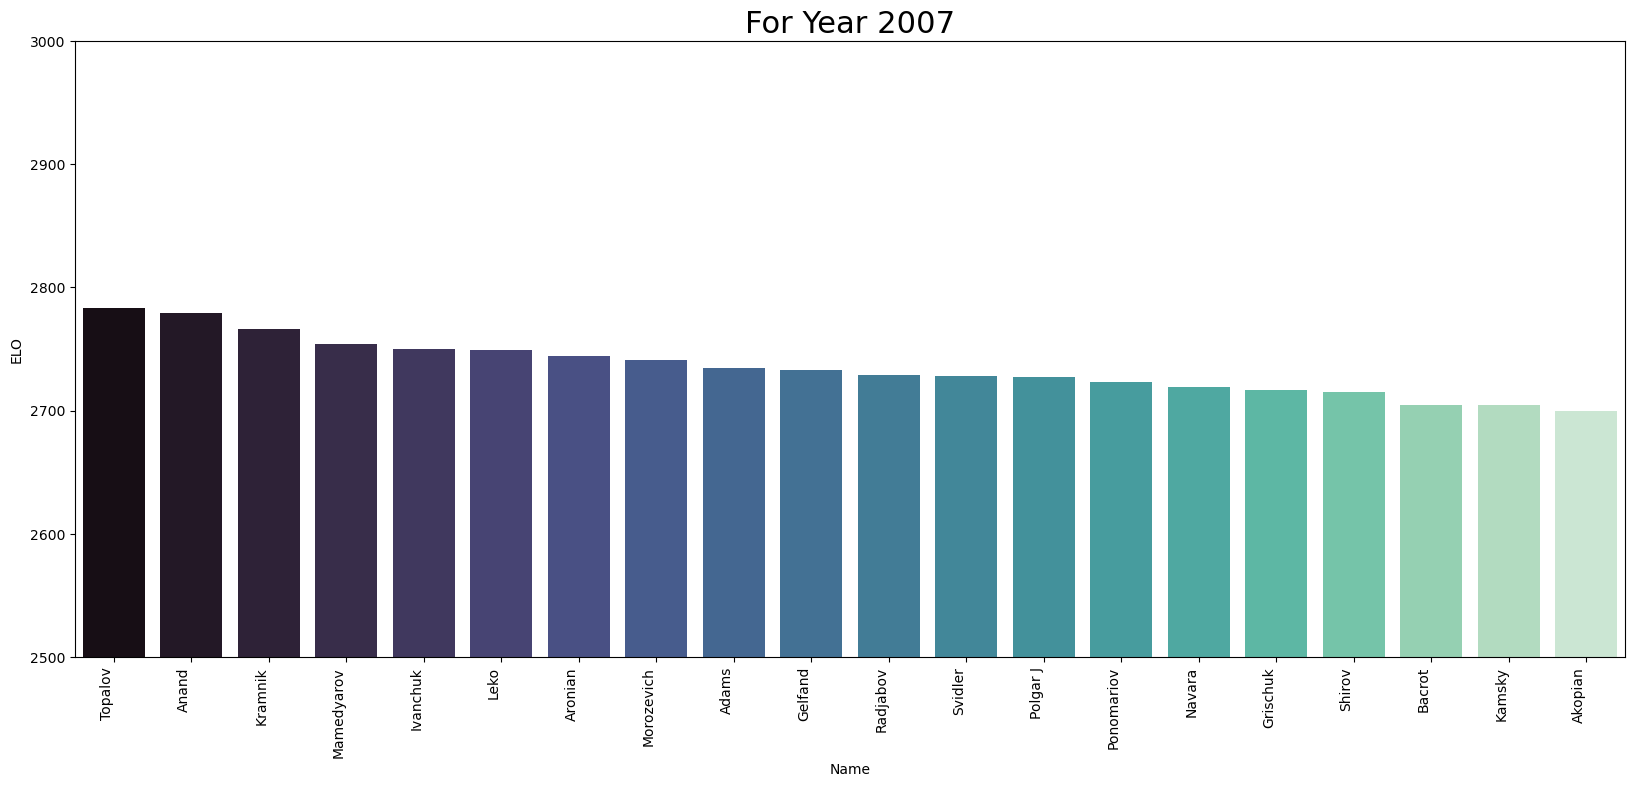

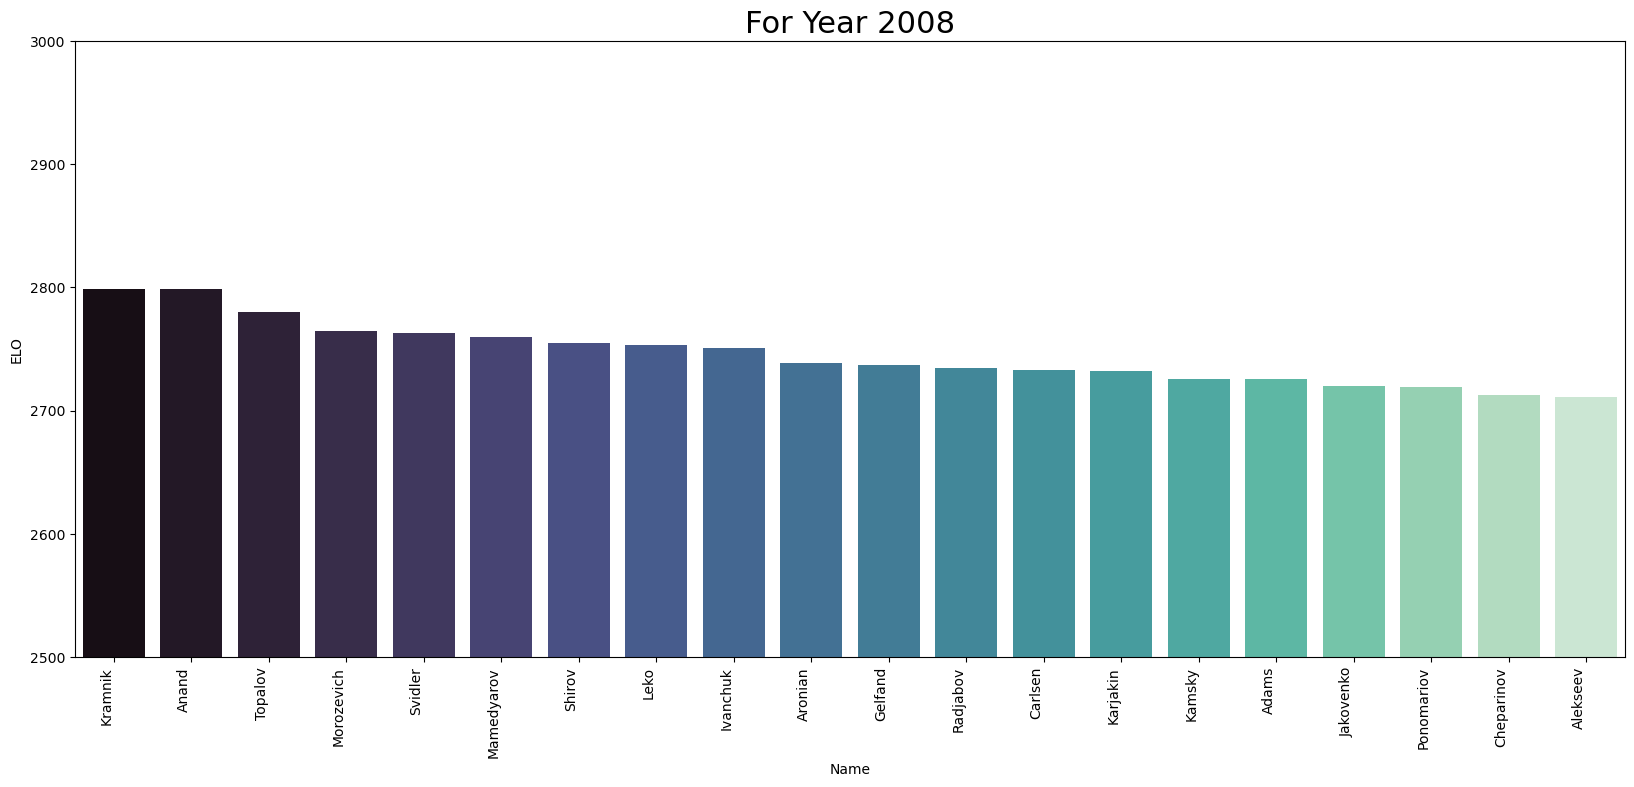

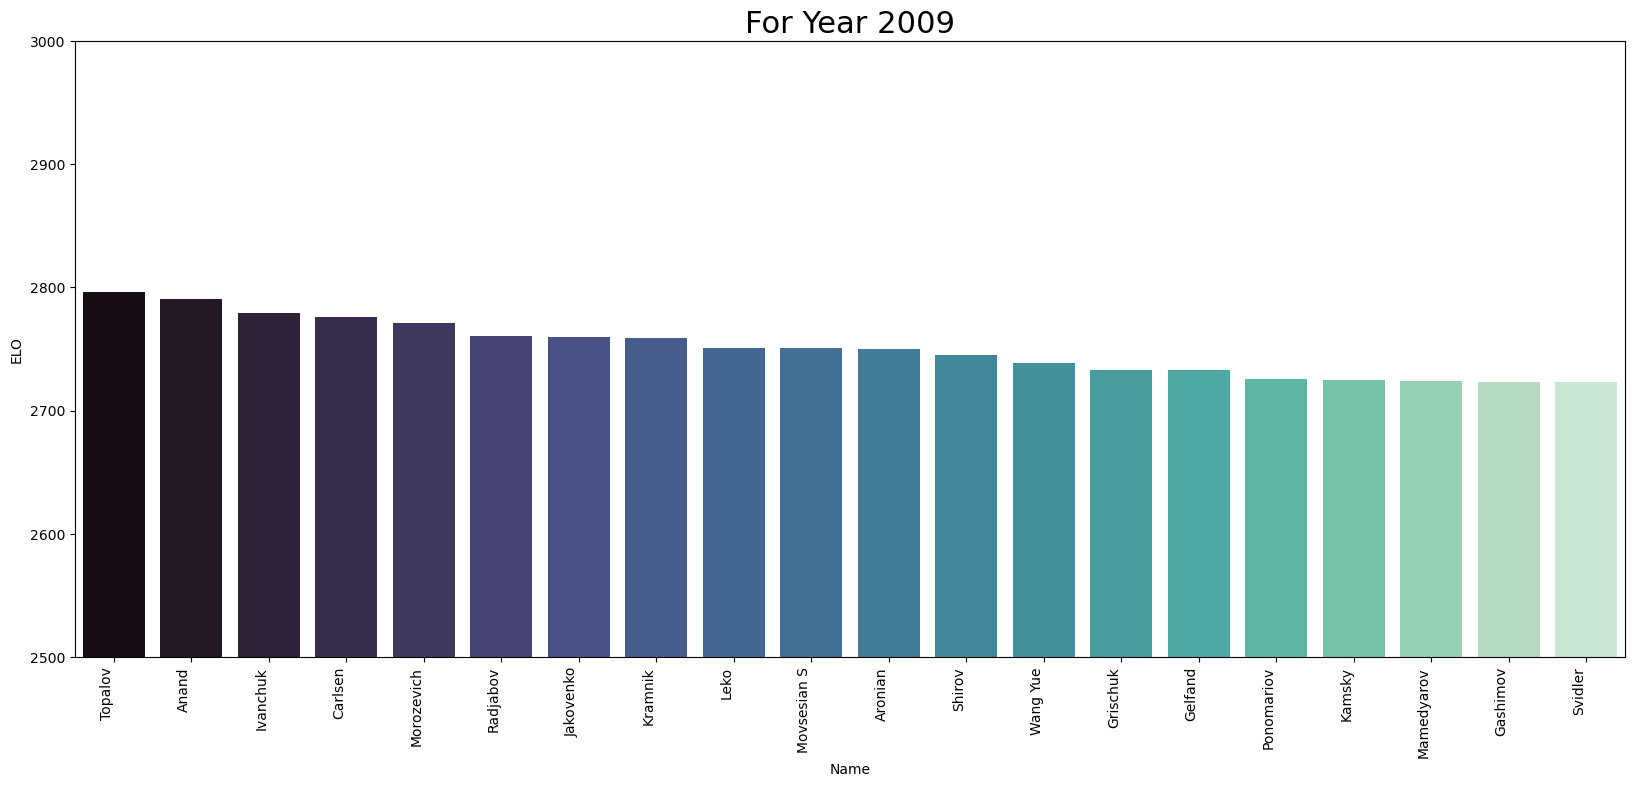

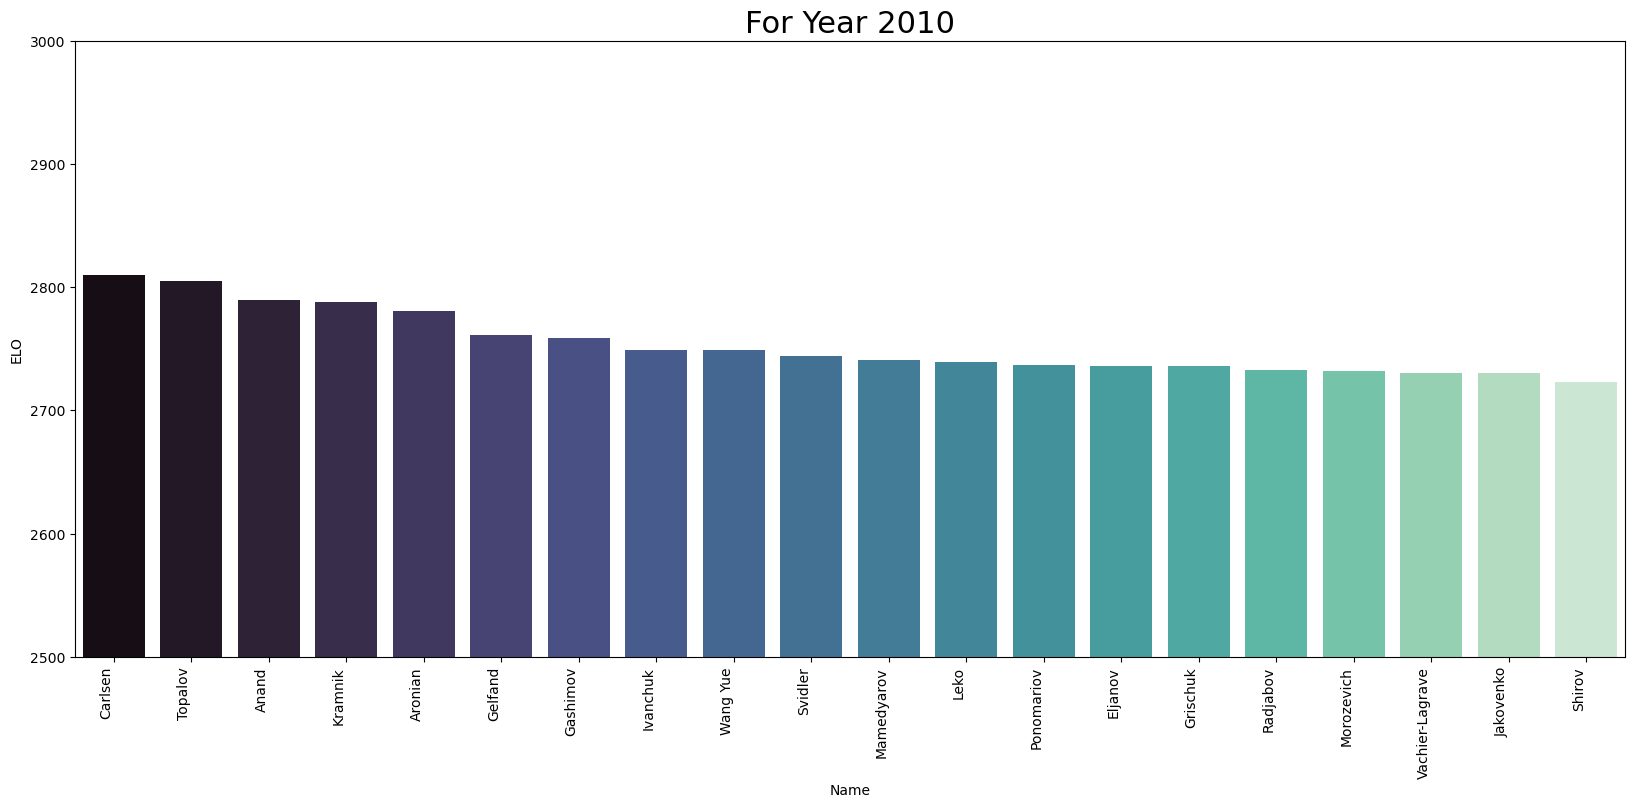

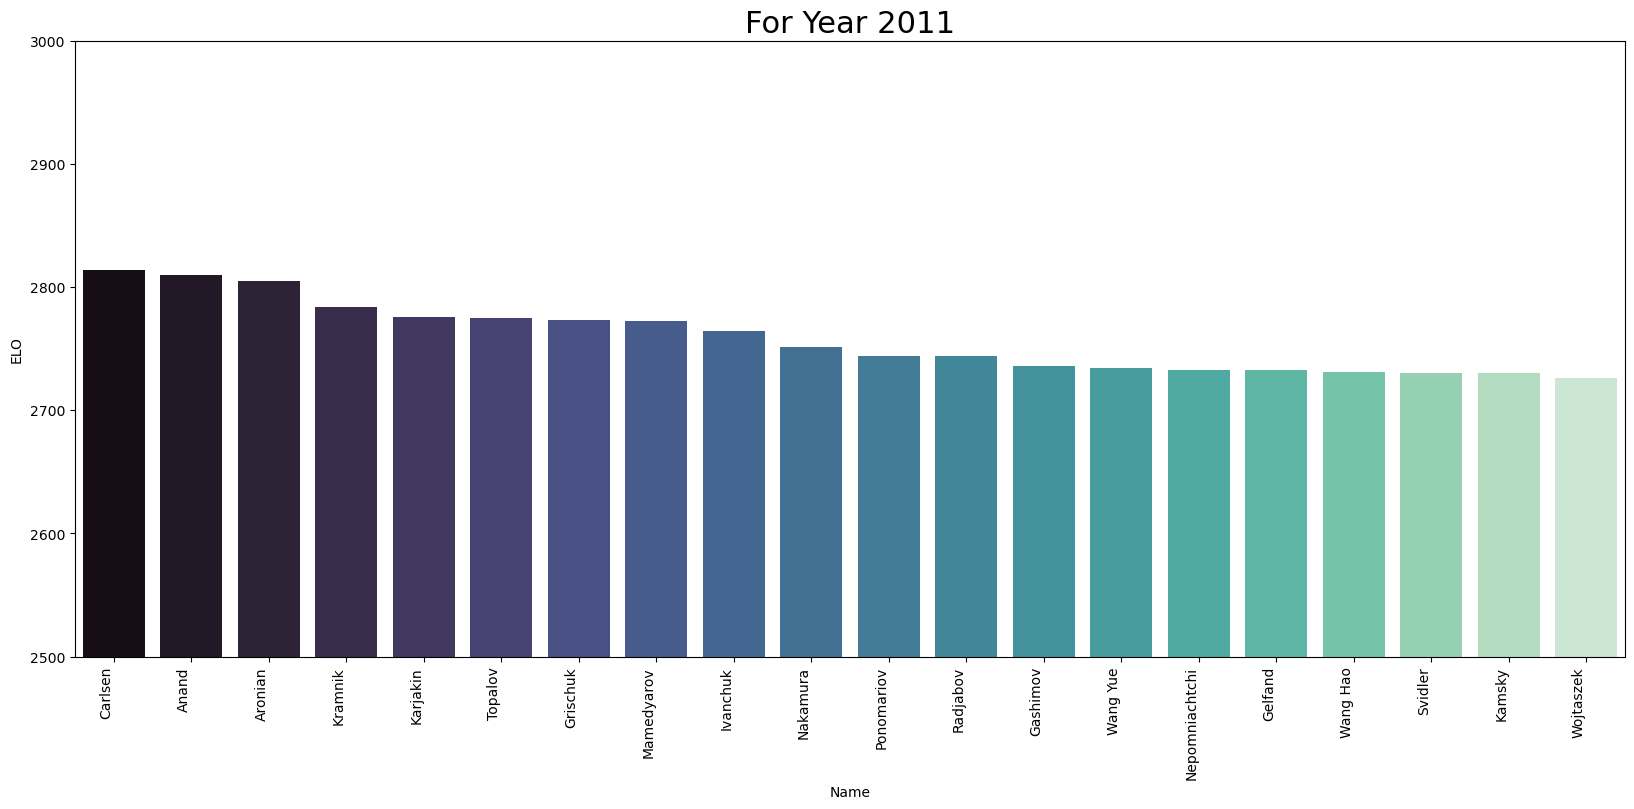

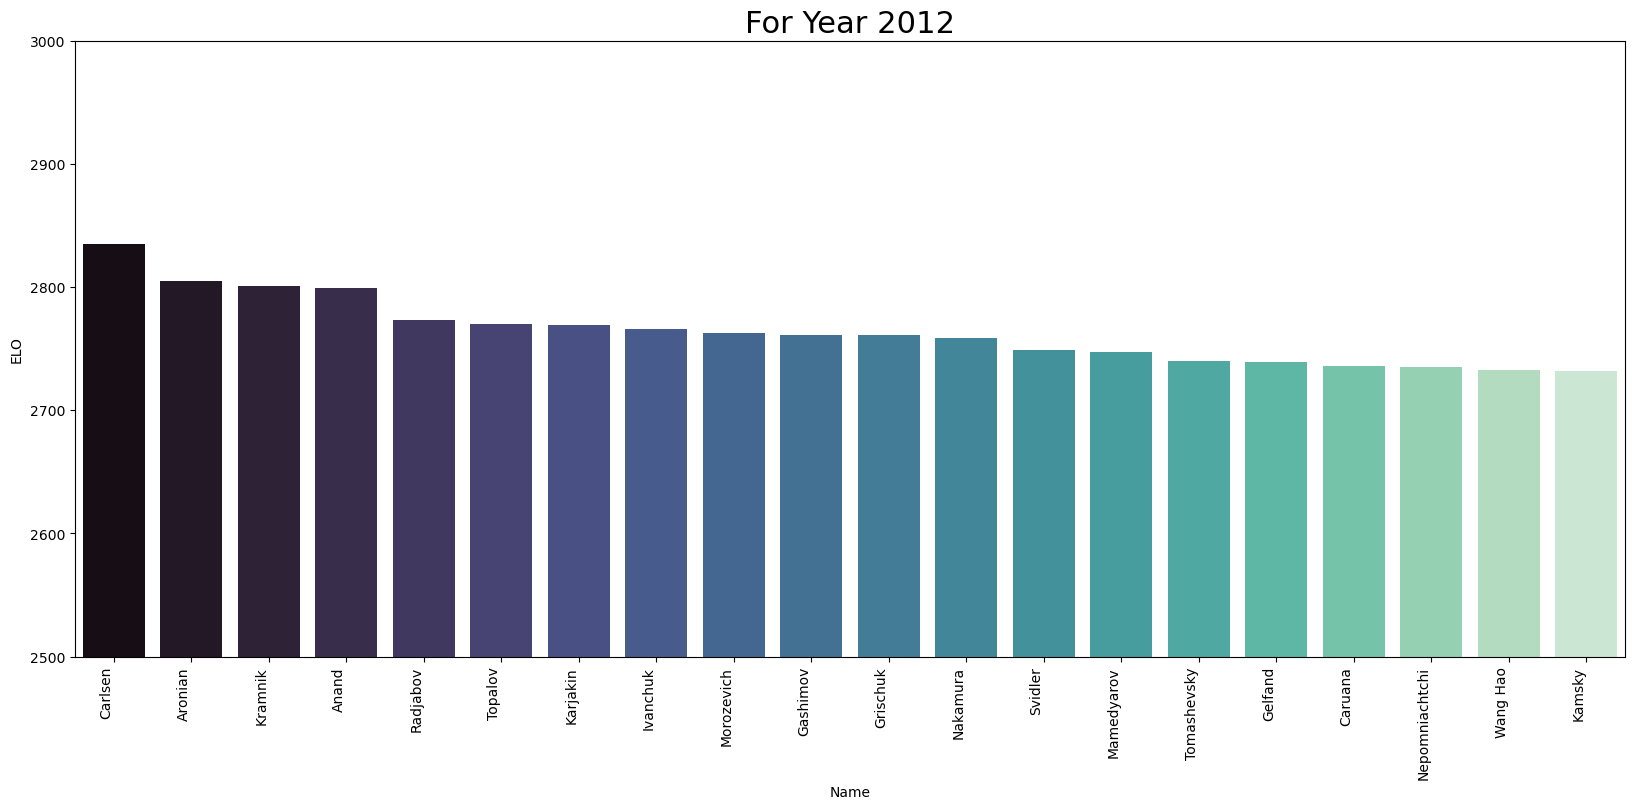

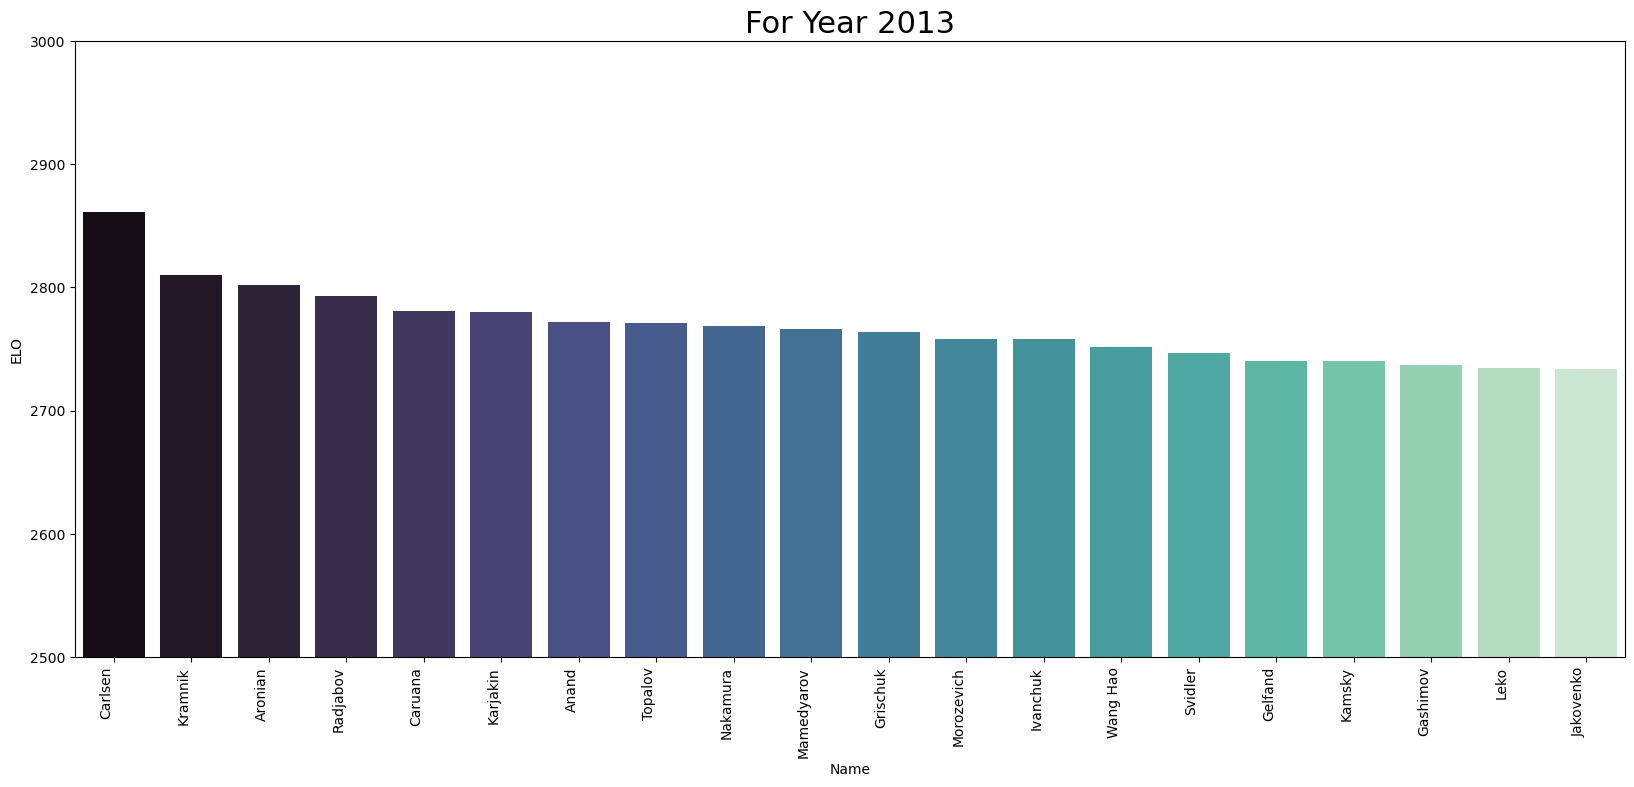

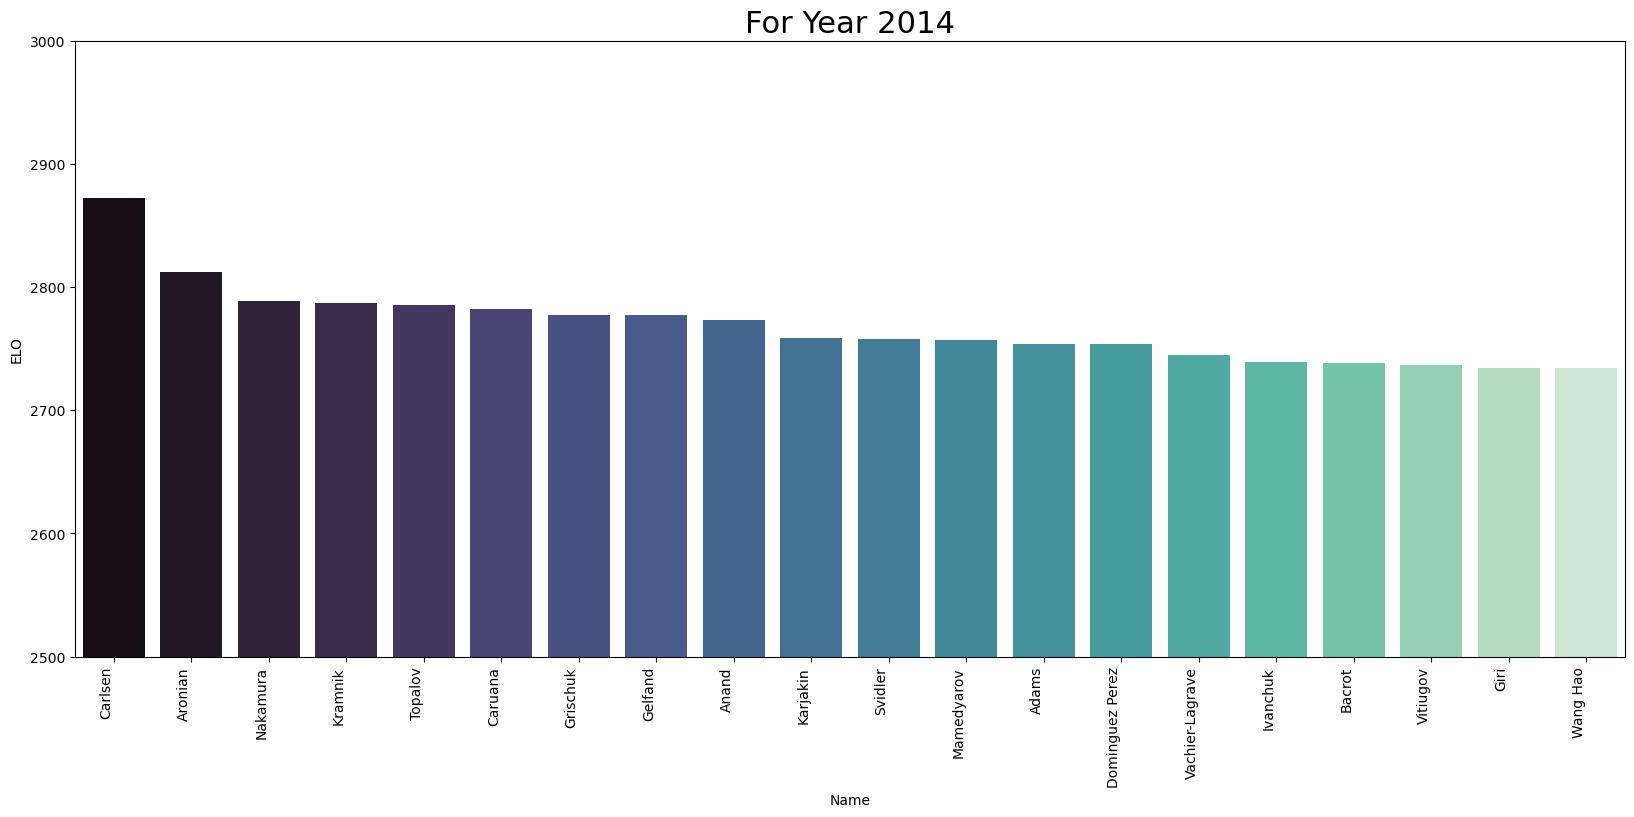

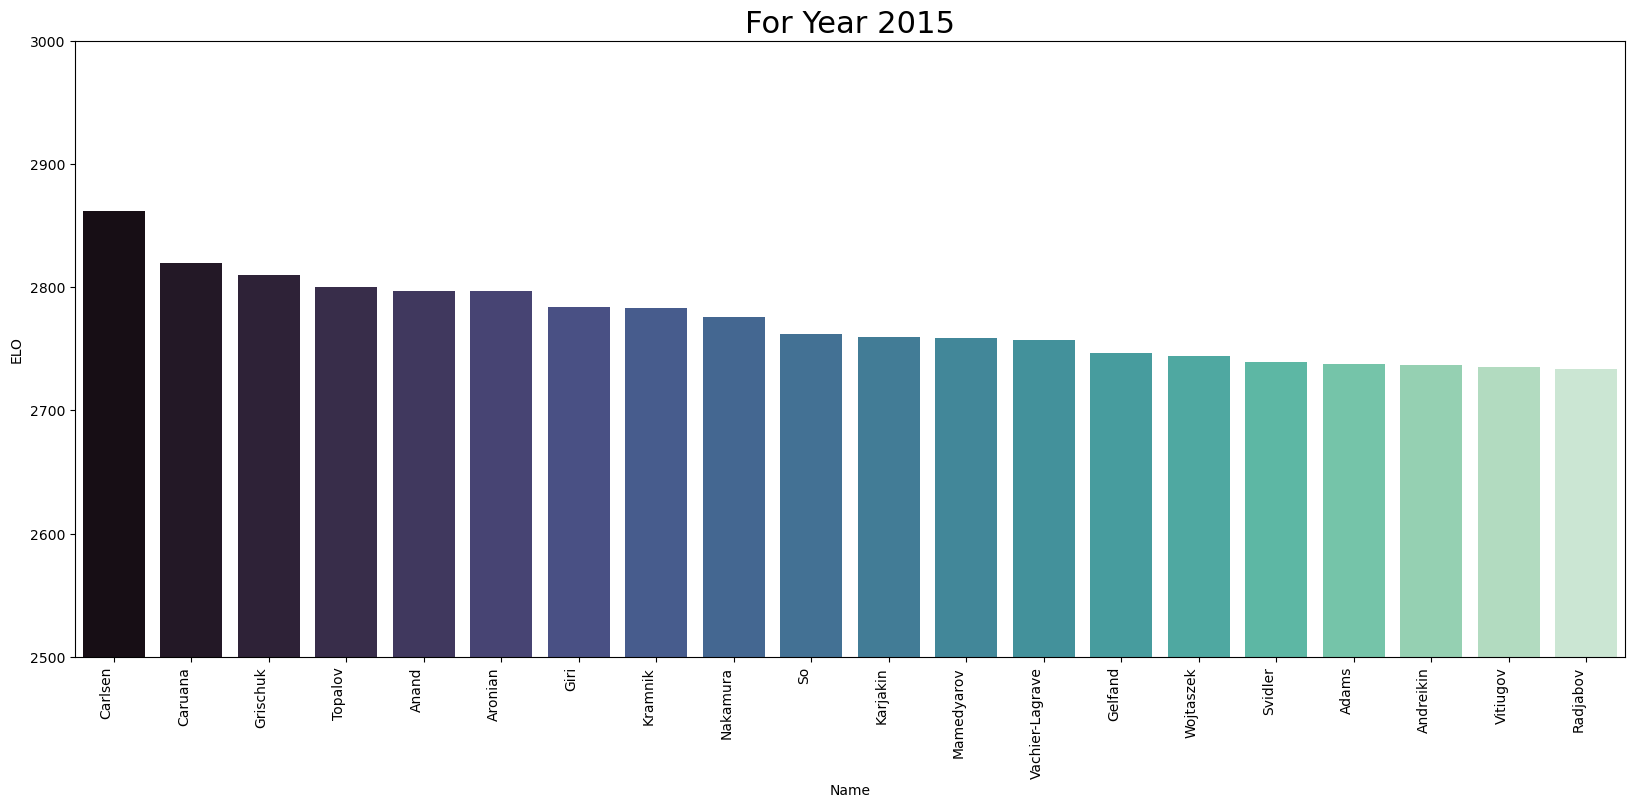

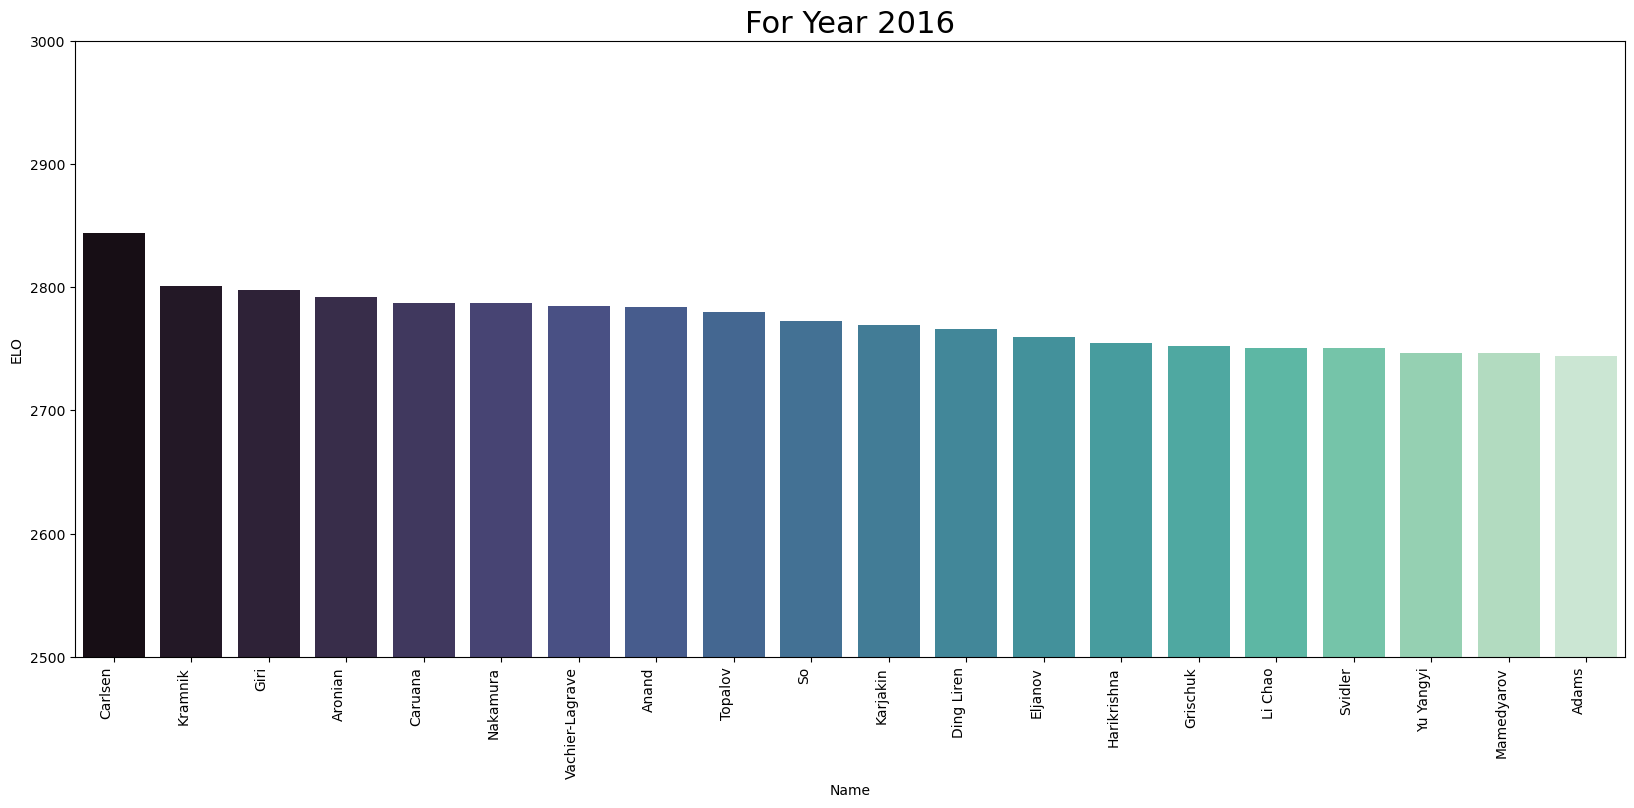

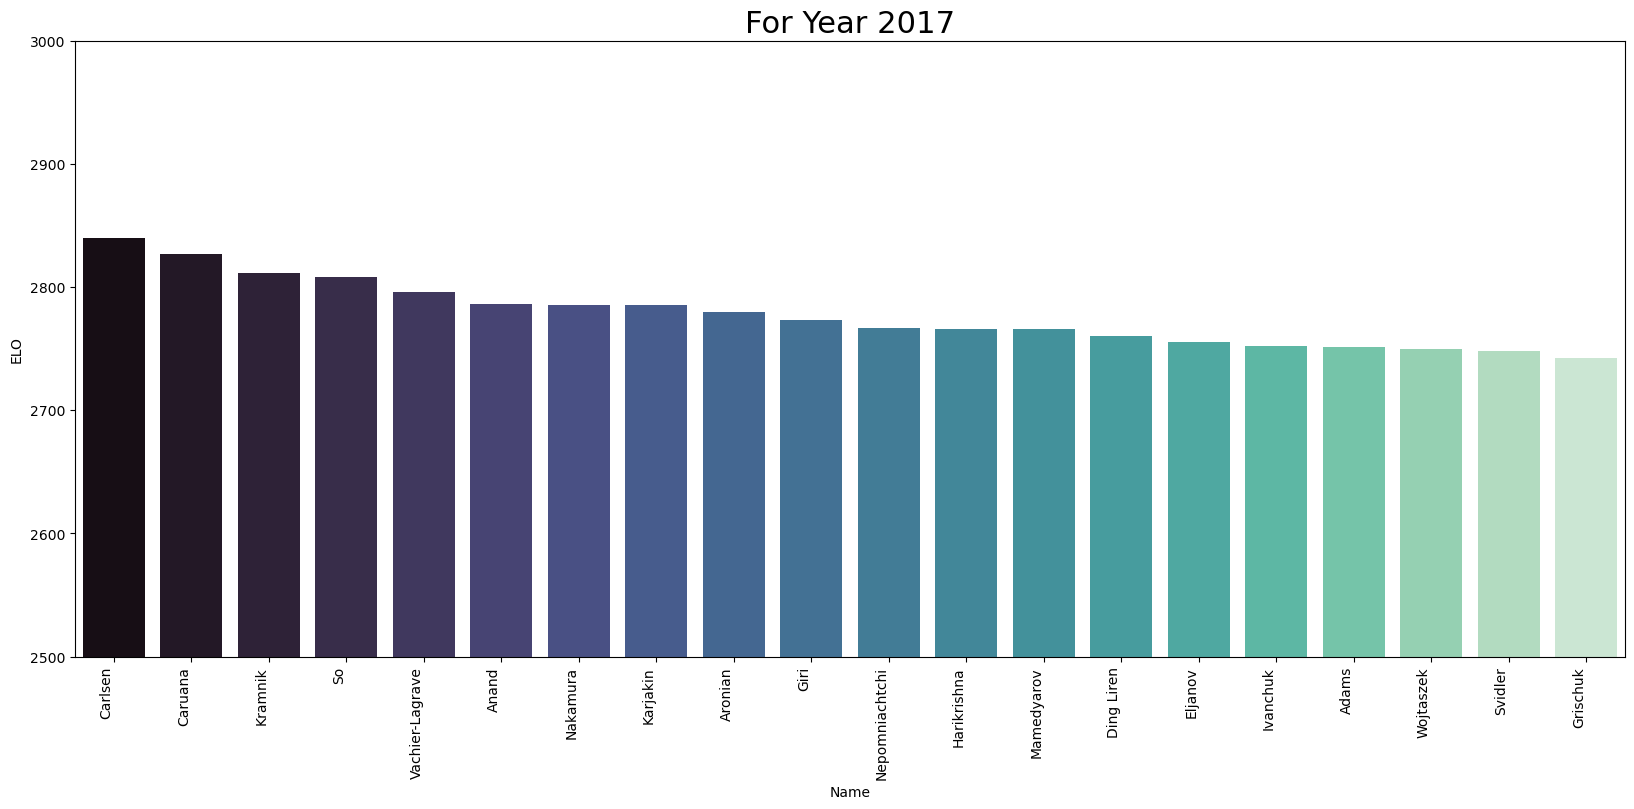

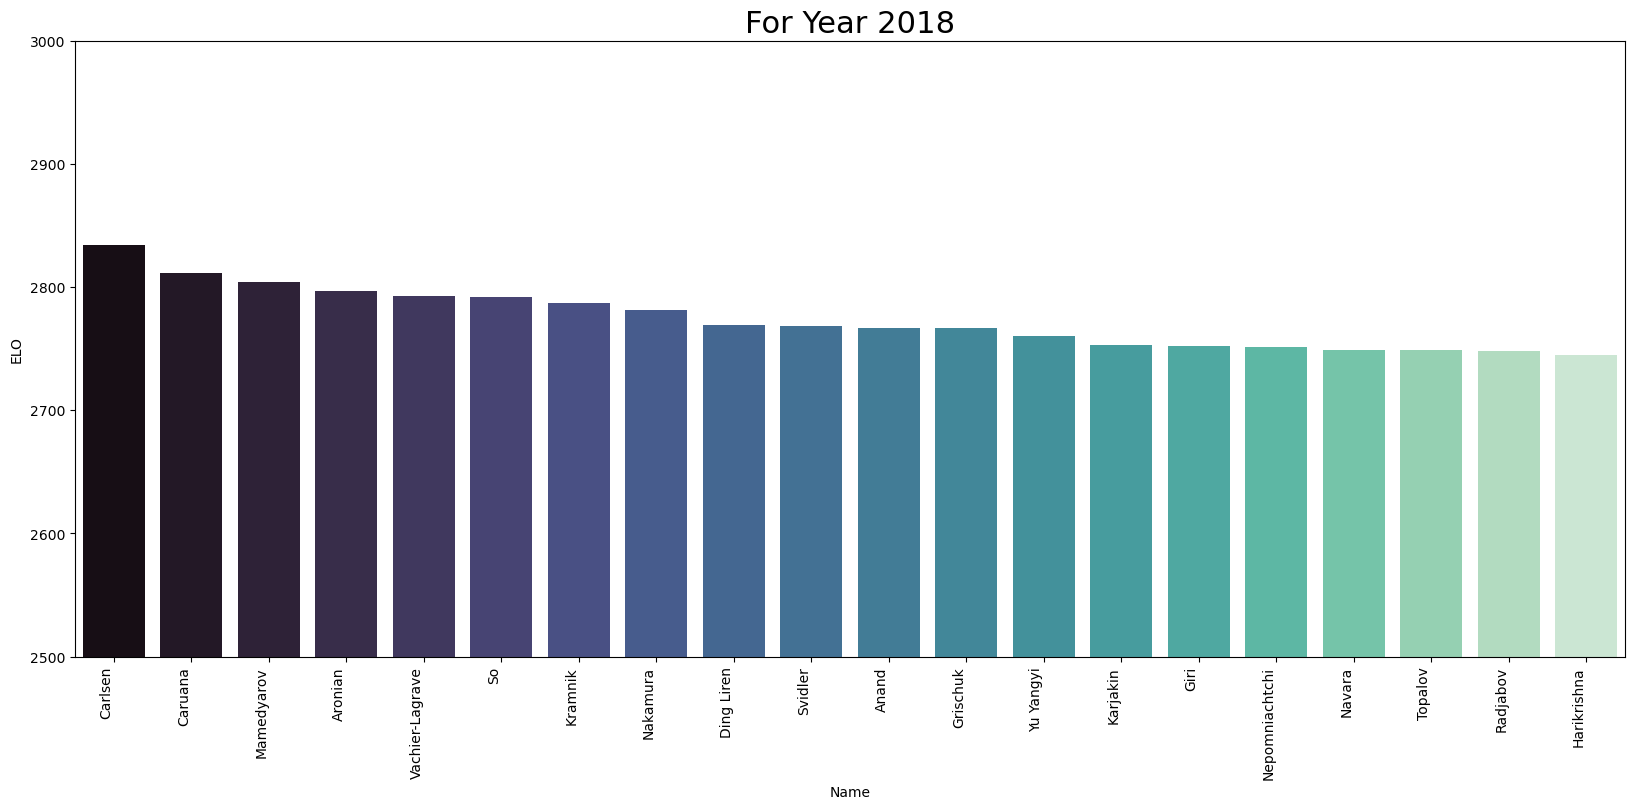

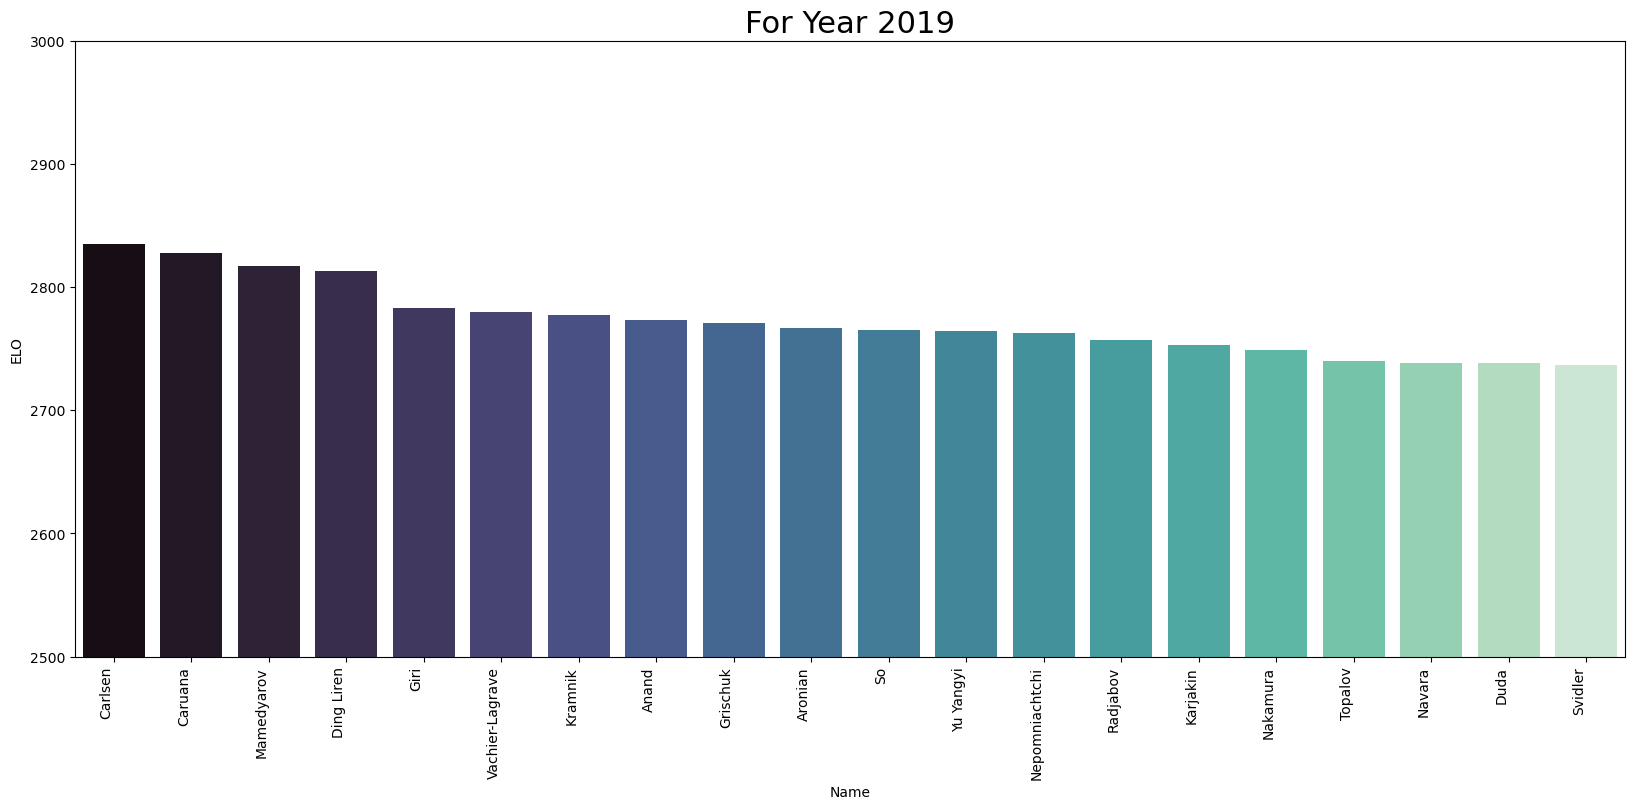

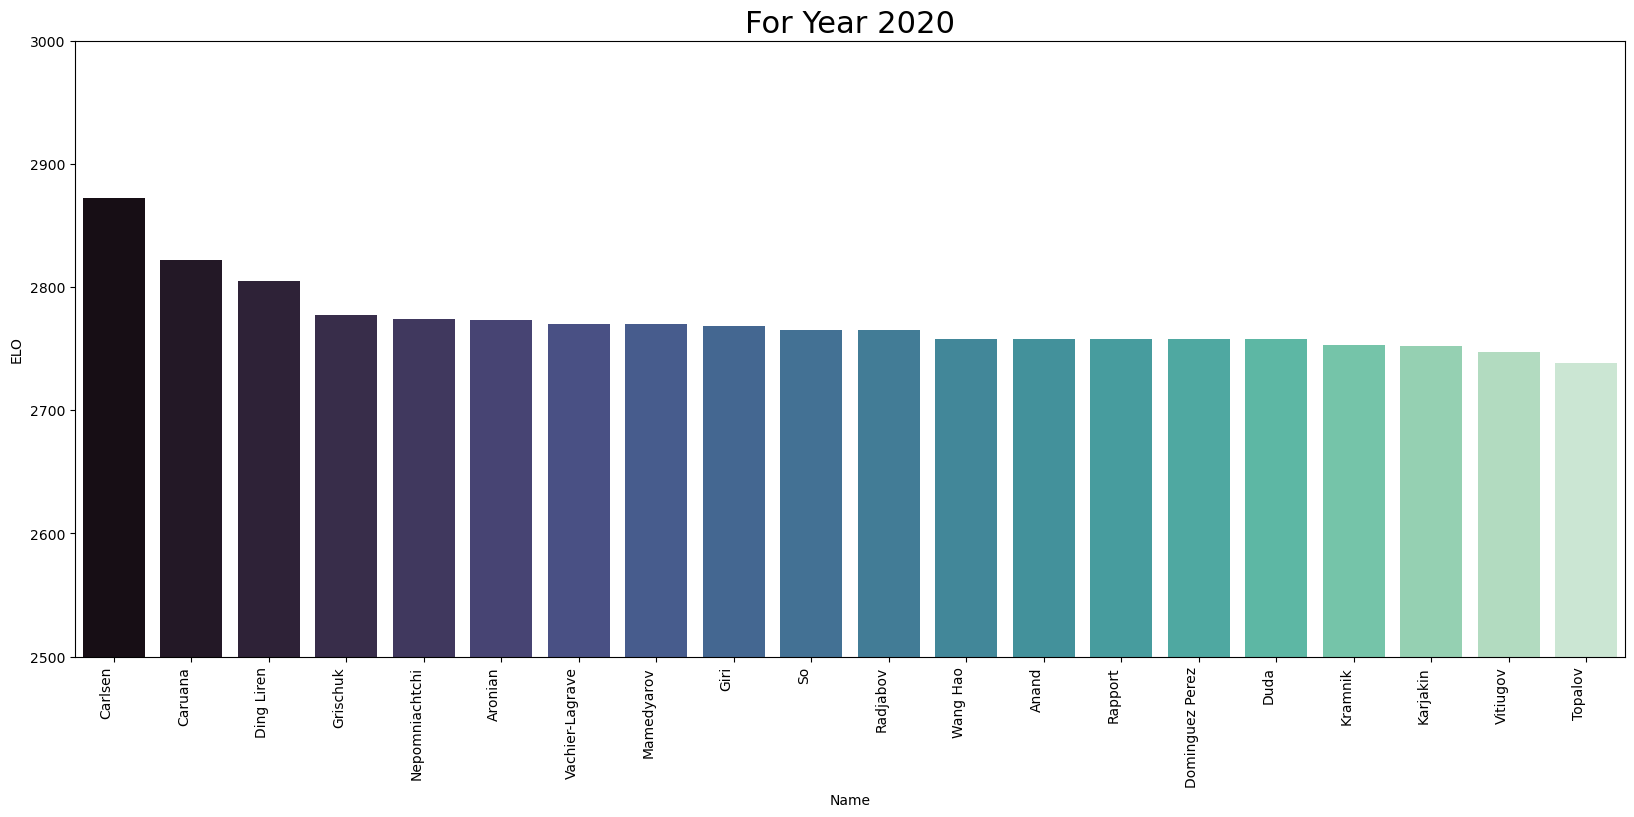

In [68]:
for i in range(2000, 2021):
    year_wise(i)

In [29]:
top = data[(data['Name']=='Anand')|(data['Name']=='Carlsen')| (data['Name']=='Caruana') | (data['Name']=='Ding Liren') | (data['Name']=='Nepomniachtchi')| (data['Name']=='So')]
name = data['Name'].unique()
top2 = data[data['Name'].isin(name[:10])]


In [58]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)

In [59]:
px.line(data_frame=top2, 
       x = 'New_Date', 
       y = 'ELO',
       color = 'Name',
       hover_name='Name', 
       width=1200, height=500,
       
)


In [60]:
fig = px.line(data_frame=top2, 
       x = 'New_Date', 
       y = 'Position (in January)',
       color = 'Name',
       hover_name='Name', 
       width=1200, height=500,
)
fig.update_yaxes(autorange="reversed")

In [61]:
carlsen = data[data['Name']=='Carlsen']

In [62]:
fig = px.line(data_frame=carlsen, 
       x = 'New_Date', 
       y = 'Position (in January)', 
       width=1200, height=500,
    
)
fig.update_yaxes(autorange="reversed")

In [63]:
fig = px.line(data_frame=carlsen, 
       x = 'New_Date', 
       y = 'ELO', 
       width=1200, height=500,
    
)
fig.update_yaxes()